In [1]:
from discriminator.discriminator_wrapper import DiscriminatorWrapper
from coco_utils import load_coco_data_struct
import tensorflow as tf
import numpy as np

Using TensorFlow backend.


### Load data

In [2]:
attention_mode = False
attention_type = None
if attention_mode:
    vocab_data, train_data, _ = load_coco_data_struct(base_dir="datasets/self_process", 
                                                             source_image_features='block5_conv4_max_pooled',
                                                             is_caption_separated=True,
                                                             mock_val=True)
    val_data, train_data = train_data.split(0.3)
else:
    vocab_data, train_data, val_data = load_coco_data_struct()


Loaded vocab data.
Embedding <class 'numpy.ndarray'> (1004, 304) float64
Word to index <class 'dict'> 1004
Index to word <class 'list'> 1004

Loaded train data.
Captions <class 'numpy.ndarray'> (400135, 17) int32
Image indices <class 'numpy.ndarray'> (400135,) int32
Image features <class 'numpy.ndarray'> (82783, 4096) float32
Image urls <class 'numpy.ndarray'> (82783,) <U63

Loaded val data.
Captions <class 'numpy.ndarray'> (195954, 17) int32
Image indices <class 'numpy.ndarray'> (195954,) int32
Image features <class 'numpy.ndarray'> (40504, 4096) float32
Image urls <class 'numpy.ndarray'> (40504,) <U63


### Pretrain and save

In [3]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
disc = DiscriminatorWrapper(train_data, val_data, vocab_data, attention_type=attention_type)
tf.global_variables_initializer().run()

In [4]:
batch_size = 3
iter_num = 5
train_loss, val_loss = disc.pre_train(sess, iter_num=iter_num, batch_size=batch_size)

iter 0, loss: -0.003460424020886421


1.0 | Avg reward: -0.051572974771261215


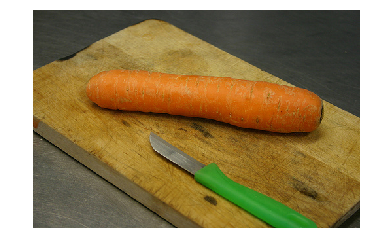

a               0.96
carrot          -0.73
on              -0.21
a               -0.31
cutting         -0.35
board           -0.18
lying           0.16
next            0.19
to              0.046
a               0.0035
knife           -0.23
<END>           0.021
- - - -
1.0 | Avg reward: 0.04965183138847351


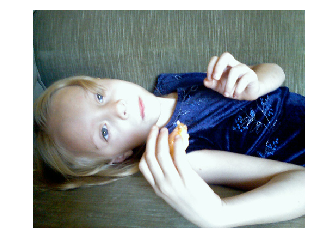

a               0.83
little          -0.16
girl            0.055
laying          -0.063
on              0.13
a               -0.11
couch           0.19
holding         -0.091
food            -0.17
<END>           -0.11
- - - -
1.0 | Avg reward: -0.0889367088675499


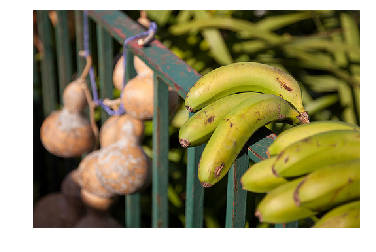

<UNK>           0.96
of              -0.69
bananas         -0.44
and             -0.29
<UNK>           -0.23
<UNK>           -0.15
on              0.15
a               -0.091
fence           -0.069
<END>           -0.046
- - - -
1.0 | Avg reward: 0.05274007469415665


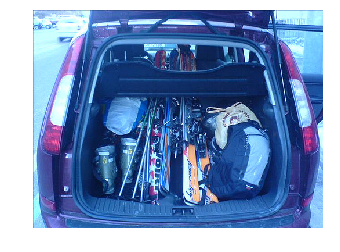

a               0.76
bunch           -0.26
of              -0.026
skis            -0.057
in              0.29
the             0.2
back            0.073
of              -0.002
a               -0.094
vehicle         -0.27
<END>           -0.046
- - - -
1.0 | Avg reward: -0.11849973350763321


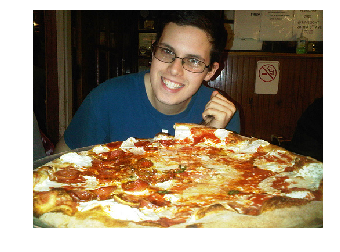

a               0.98
smiling         -0.75
man             -0.41
with            -0.25
glasses         -0.36
with            -0.047
a               -0.12
pepperoni       -0.057
pizza           -0.084
<END>           -0.093
- - - -
0.0 | Avg reward: -0.08964691311120987


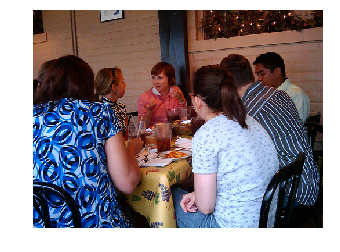

beach           0.99
<UNK>           -0.79
<UNK>           -0.34
out             -0.25
underneath      -0.11
a               -0.15
red             -0.11
umbrella        0.0046
<END>           -0.058
- - - -
0.0 | Avg reward: 0.11478791385889053


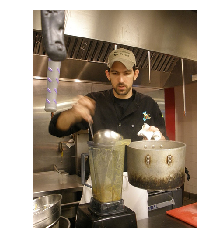

a               0.88
polar           0.019
bear            0.089
stands          -0.045
on              0.21
some            -0.035
rocks           -0.11
<END>           -0.08
- - - -
0.0 | Avg reward: 0.031760767102241516


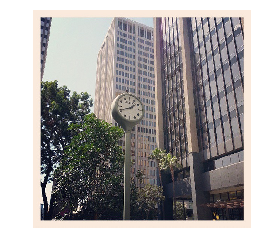

a               0.82
cat             -0.29
<UNK>           -0.085
the             0.13
<UNK>           -0.067
of              -0.021
a               -0.096
<UNK>           -0.049
<END>           -0.061
- - - -
0.0 | Avg reward: -0.08867496997117996


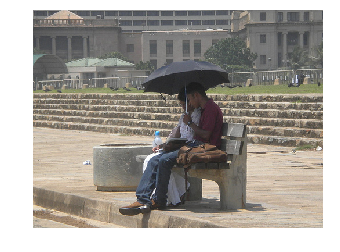

a               0.99
giraffe         -0.71
<UNK>           -0.33
a               -0.3
rock            -0.22
in              0.15
its             -0.091
enclosure       -0.25
<END>           -0.048
- - - -
0.0 | Avg reward: 0.01105527300387621


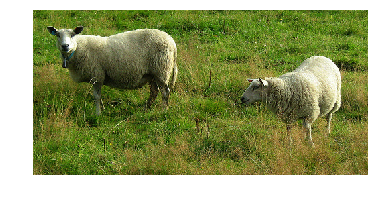

a               0.95
bath            -0.44
room            0.16
with            -0.029
a               -0.12
sink            -0.38
and             0.036
a               -0.015
shower          0.024
<END>           -0.074
- - - -


0.013589958

In [5]:
disc.examine_validation(sess, batch_size=5)

In [7]:
model_name = "discriminator2"
disc.save_model(sess, model_name=model_name)

### Assign rewards

1.0 | Avg reward: 0.09509546309709549


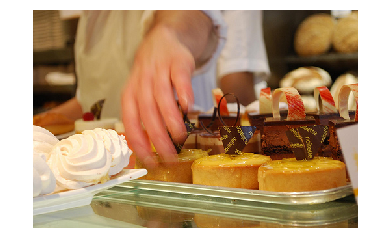

beautiful       0.74
pastries        -0.28
with            -0.0015
hand            -0.078
- - - -
1.0 | Avg reward: -0.03279528766870499


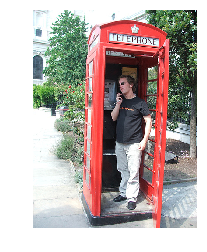

a               0.99
man             -0.73
in              0.046
black           -0.22
<UNK>           -0.2
in              0.15
red             -0.15
phone           -0.051
<UNK>           -0.12
- - - -
1.0 | Avg reward: 0.13606511056423187


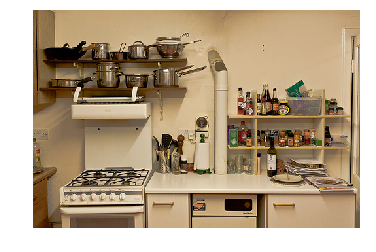

cat             -0.17
dogs            0.36
one             0.2
<UNK>           0.16
- - - -


In [8]:
train_image_idx = np.array([1, 2, 3])
captions = np.array(["beautiful pastries with hand", "a man in black t-shirt in red phone booth", "cat dogs one helloo"])
_, rewards, _ = disc.assign_reward(sess, 
                                   train_image_idx, 
                                   captions,
                                   image_idx_from_training=True, 
                                   to_examine=True)
assert rewards.shape[0] == len(train_image_idx)
sess.close()

### Load Model

In [9]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
loaded_disc = DiscriminatorWrapper(train_data, val_data, vocab_data,
                                   load_session=sess,
                                   saved_model_name=model_name,
                                   attention_type=attention_type)
                                   

INFO:tensorflow:Restoring parameters from models/discr/discriminator2


In [10]:
_, rewards_after_loaded, _ = loaded_disc.assign_reward(sess, 
                                                       train_image_idx, 
                                                       captions,
                                                       image_idx_from_training=True, 
                                                       to_examine=False)

assert np.array_equal(rewards, rewards_after_loaded), "Loaded model should assign same rewards as trained model"

1.0 | Avg reward: -0.04876607283949852


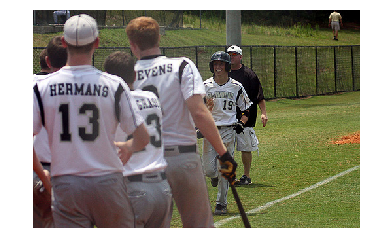

a               0.98
boy             -0.53
in              -0.074
a               -0.25
baseball        -0.077
uniform         -0.26
running         -0.12
towards         -0.045
his             0.042
<UNK>           -0.094
<END>           -0.11
- - - -
1.0 | Avg reward: 0.03844287618994713


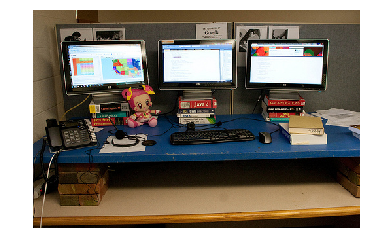

a               0.86
desk            -0.18
with            0.024
<UNK>           -0.041
<UNK>           -0.048
a               -0.066
lot             -0.063
of              0.0089
books           0.074
and             -0.046
a               -0.1
keyboard        0.025
on              0.23
it              -0.028
<END>           -0.064
- - - -
1.0 | Avg reward: 0.023526446893811226


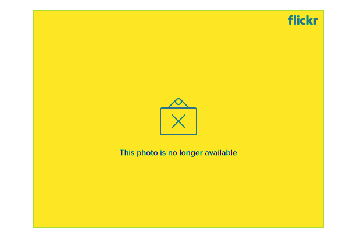

a               0.87
young           -0.31
man             -0.15
sitting         0.056
in              0.19
front           -0.0047
of              -0.018
a               -0.11
white           -0.078
<UNK>           -0.1
<END>           -0.087
- - - -
1.0 | Avg reward: 0.0310123972594738


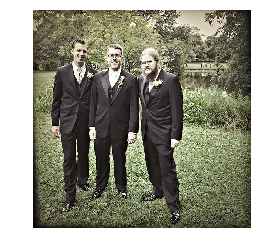

tree            0.93
men             -0.37
dressed         -0.13
in              0.12
black           -0.096
suits           -0.13
with            -0.00084
white           -0.096
flowers         0.11
in              0.17
the             0.11
<UNK>           -0.097
<END>           -0.12
- - - -
1.0 | Avg reward: -0.001679840381257236


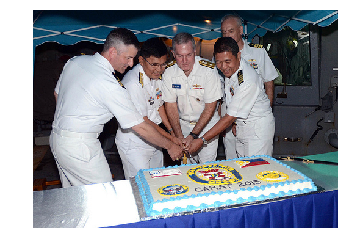

a               0.94
bunch           -0.31
of              -0.17
<UNK>           -0.17
ship            -0.088
<UNK>           -0.062
cut             -0.1
into            0.098
a               -0.062
cake            0.021
<END>           -0.11
- - - -
0.0 | Avg reward: 0.03337741270661354


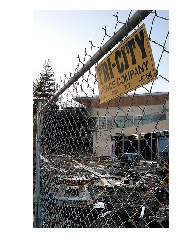

<UNK>           0.66
is              -0.44
doing           0.011
something       0.037
at              -0.069
the             0.17
<UNK>           -0.037
that            0.062
is              -0.0086
<UNK>           0.015
<END>           -0.025
- - - -
0.0 | Avg reward: 0.03399544954299927


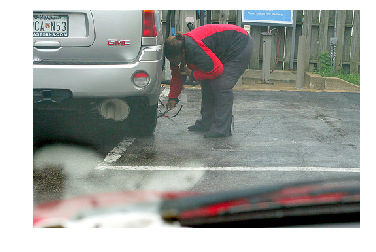

a               0.83
wide            -0.38
blue            0.11
vase            -0.062
is              -0.013
holding         -0.008
an              0.062
orange          -0.1
<UNK>           -0.032
<END>           -0.067
- - - -
0.0 | Avg reward: -0.03997150436043739


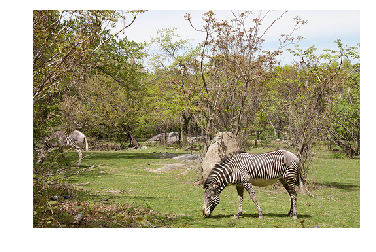

a               0.98
girl            -0.63
is              -0.23
holding         -0.13
a               -0.14
<UNK>           -0.062
phone           0.031
over            0.0049
her             -0.081
head            -0.11
<END>           -0.074
- - - -
0.0 | Avg reward: -0.048518162220716476


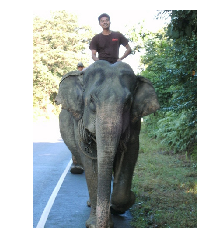

a               0.99
bathroom        -0.83
with            -0.16
a               -0.19
large           -0.052
white           -0.14
sink            -0.42
in              0.27
it              0.051
<END>           -0.014
- - - -
0.0 | Avg reward: -0.019001437351107597


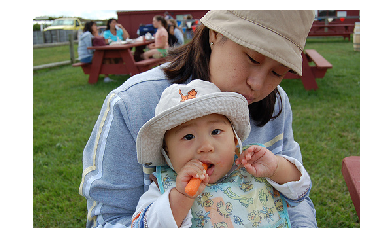

a               0.99
man             -0.71
riding          -0.39
a               -0.25
snowboard       -0.064
next            0.1
to              -0.024
a               -0.041
person          -0.05
in              0.29
skis            -0.06
<END>           -0.0065
- - - -


-0.008265404

In [11]:
loaded_disc.examine_validation(sess, batch_size=5)

### Online train